In [1]:
!pip install tensorflow keras numpy mnist matplotlib

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)
y_train (60000,)
y_test (10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

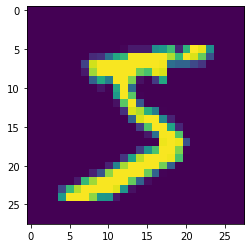

In [6]:
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense((512), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense((10), activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [20]:
Batch_size = 256
Epochs = 10

hist = model.fit(X_train, y_train_one_hot, batch_size = Batch_size, epochs=Epochs, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 10s 234us/step - loss: 0.2941 - accuracy: 0.9110 - val_loss: 0.0704 - val_accuracy: 0.9793
Epoch 2/10
42000/42000 [==============================] - 3s 76us/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.0599 - val_accuracy: 0.9811
Epoch 3/10
42000/42000 [==============================] - 3s 77us/step - loss: 0.0393 - accuracy: 0.9870 - val_loss: 0.0436 - val_accuracy: 0.9872
Epoch 4/10
42000/42000 [==============================] - 3s 78us/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0407 - val_accuracy: 0.9874
Epoch 5/10
42000/42000 [==============================] - 3s 77us/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0466 - val_accuracy: 0.9869
Epoch 6/10
42000/42000 [==============================] - 3s 76us/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0494 - val_accuracy: 0.9863
Epoch 7/10
42000/42000 [==============================] - 3s 76us/

In [21]:
model.evaluate(X_train, y_train_one_hot)[1]

60000/60000 [==============================] - 5s 92us/step


0.9942833185195923

In [28]:
from google.colab import files
upload = files.upload()
my_image = plt.imread('unnamed.jpg')

Saving unnamed.jpg to unnamed.jpg


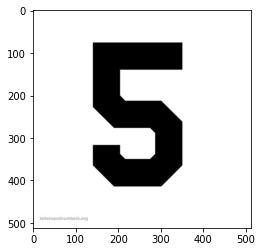

In [29]:
plt.imshow(my_image)

In [0]:
from skimage.transform import resize
my_image_resized = resize(my_image, (28, 28, 1))

In [0]:
probabilities = model.predict(np.array([my_image_resized,]))

In [32]:
probabilities

array([[3.1525313e-03, 5.6697090e-06, 1.6522130e-05, 2.8792763e-01,
        1.2093760e-02, 6.7993999e-01, 2.7575013e-06, 3.2180219e-04,
        1.3571229e-03, 1.5182295e-02]], dtype=float32)